In [2]:
import scipy.integrate

In [3]:
from scipy.integrate import solve_ivp as solve

In [16]:
from scipy.integrate import ode as ode

In [38]:
from scipy.integrate import odeint

In [57]:
import matplotlib.pyplot as plt

In [238]:
import matplotlib.animation as anim

In [145]:
plt.style.use('dark_background')

In [23]:
from numpy import exp as exp
import numpy as np

In [6]:
def fun(t,x):
    return exp(x)

In [15]:
sol=solve(fun,)

<ipython-input-6-7d46534cf590>:2: RuntimeWarning: overflow encountered in exp
  return exp(x)


In [12]:
sol.t

array([1., 1.])

In [13]:
sol.y

array([[1., 1.],
       [2., 2.],
       [4., 4.]])

In [17]:
o=ode(fun)

In [20]:
o.

AttributeError: 'ode' object has no attribute 'x'

Nope
$$ \text x(t) = \exp(t)$$
$$ \text y(t) = y^2 + 2 $$
$$ \text u(t) = \text x(t)*\text y(t) $$

Najpierw jedno
$$ \frac{\text d^2 x}{\text d^2 t} = \sqrt{\left(\frac{\text d x}{\text d t}\right)} + \frac{1}{x} $$

In [135]:
def func(x,t):
    return x[1],x[1]**(1/2)+1/x[0]

In [136]:
x0=[1.0,1.0]

In [137]:
time=np.linspace(0,15,100)

In [138]:
od=odeint(func,x0,time)

In [139]:
len(time)

100

No handles with labels found to put in legend.


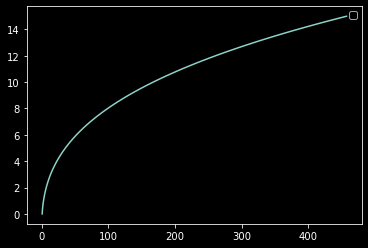

In [146]:
plt.plot(od[:,0],time)
plt.legend()

$$ \frac{\text d x}{\text d t} = y\cdot x $$

$$ \frac{\text d y}{\text d t} = x^y $$

In [200]:
def func(u,t):
    return u[0]*u[1], u[0]**u[1]

In [201]:
u0=[0.0,1.0]

In [202]:
od =odeint(func,u0,time)

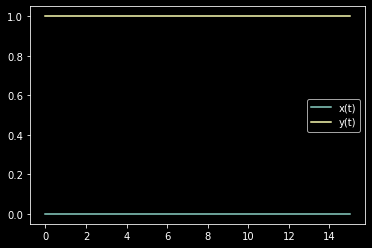

In [203]:
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.legend(["x(t)","y(t)"])

In [195]:
dd

C:\Users\Kacper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


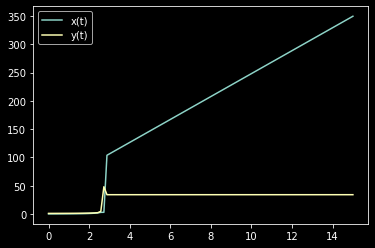

In [204]:
u0=[1/12,1]
od=odeint(func,u0,time)
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.legend(["x(t)","y(t)"])

$$ \frac{\text d^2 x}{\text d^2 t} = y\frac{\text d x}{\text d t}-x\frac{\text d y}{\text d t}$$

$$ \frac{\text d^2 y}{\text d^2 t} = \frac{\text d x}{\text d t} \cdot \frac{\text d y}{\text d t} $$

In [147]:
def func(u,t):
    return u[1],[u[0,1]*u[1,0]-u[1,1]*u[0,0],u[1,1]*u[1,0]]

In [205]:
def func(u,t):
    return [u[1,0],u[0,1]*u[1,0]-u[1,1]*u[0,0]],[u[1,1],u[1,1]*u[1,0]]

In [212]:
def func(u,t):
    return u[1], u[1]*u[2]-u[3]*u[0], u[3], u[3]*u[1]

In [221]:
u0=[1,1,1,1]

In [222]:
time=np.linspace(0,15,100)

In [223]:
od=odeint(func,u0,time)

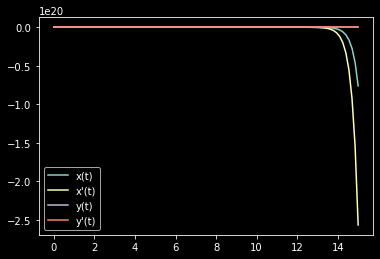

In [224]:
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.plot(time,od[:,2])
plt.plot(time,od[:,3])
plt.legend(["x(t)","x'(t)","y(t)","y'(t)"])

In [225]:
def r(x,y):
    return (x**2+y**2)**(1/2)

In [227]:
k,m,l=1.5,2.,0.5
def f(x,y):
    return -k/m*(1-l/r(x,y))

In [232]:
g=9.81
def func(u,t):
    x,dx,y,dy=u
    return dx, x*f(x,y), dy, g+y*f(x,y)

In [234]:
od=odeint(func,[np.cos(np.pi/12),0,np.sin(np.pi/12),0],time)

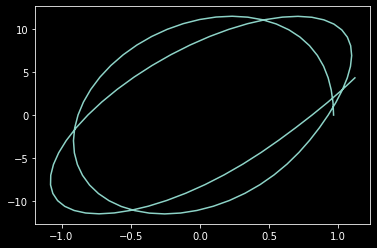

In [246]:
plt.plot(od[:,0],od[:,3])

<IPython.core.display.Javascript object>


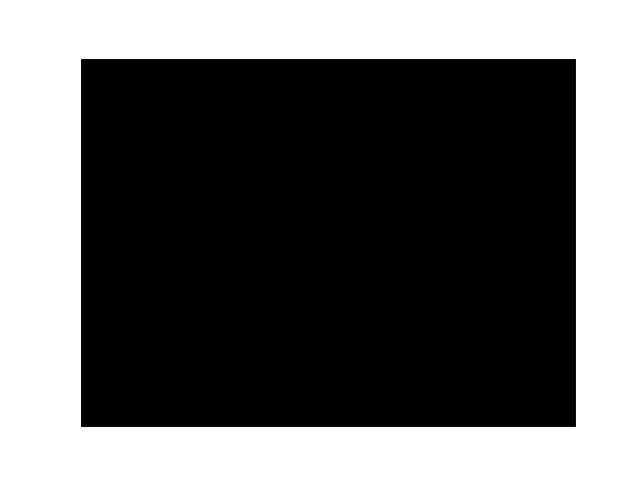

In [327]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od[:,0]
y=od[:,3]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x)*1.1,max(x)*1.1)
ax.set_ylim(min(y)*1.1,max(y)*1.1)

def animate(i):
    line.set_data(od[:i,0], od[:i,3])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, )
plt.show()

<IPython.core.display.Javascript object>


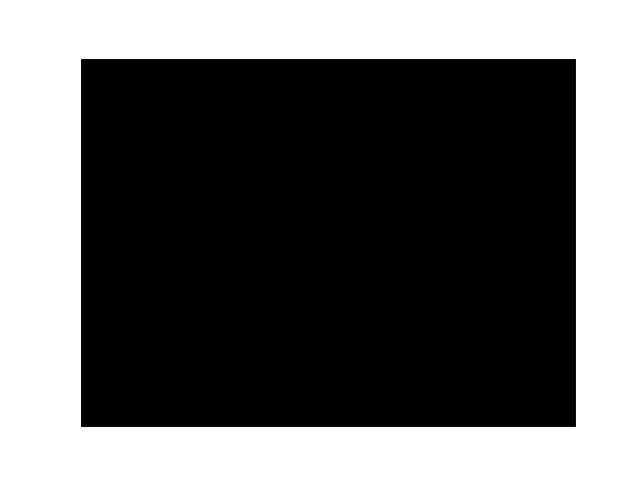

In [331]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od[:,0]
y=od[:,2]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
    line.set_data(od[:i,0], od[:i,2])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, repeat=True)
plt.show()

In [248]:
def animate(i):
    x.append(od[0,i])
    y.append(od[3,i])

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([-2,2])
    ax.set_ylim([-11,11])

In [251]:
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])

<IPython.core.display.Javascript object>


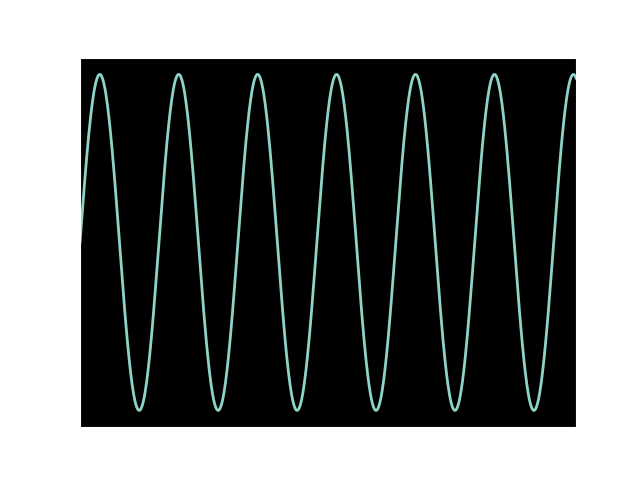

In [322]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(i):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(2 * np.pi * (x + 0.1 * i))
    line.set_data(x, y)
    return (line,)

ani = FuncAnimation(fig, animate, frames=100, interval=20,blit=True)
plt.show()

In [306]:
%matplotlib notebook

In [261]:
%matplotlin notebook

UsageError: Line magic function `%matplotlin` not found.


In [289]:
plt.show()

<IPython.core.display.Javascript object>


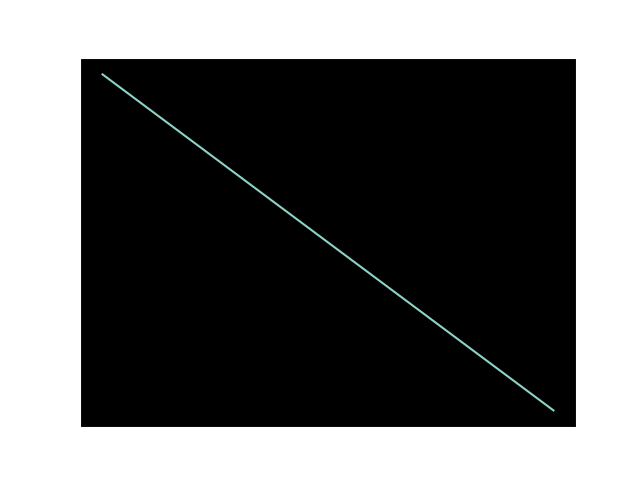

In [275]:
plt.plot([1,2,3],[3,2,1])

<IPython.core.display.Javascript object>


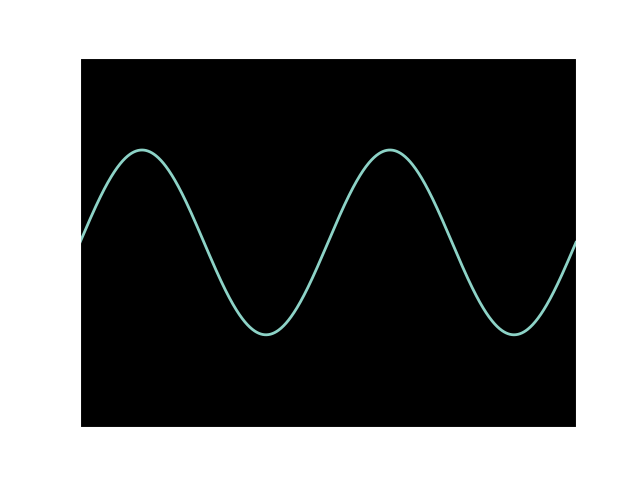

In [309]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
line.set_data([], [])
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
anim = FuncAnimation(fig, animate,frames=100, interval=20, blit=True,repeat=True)

In [338]:
times=np.linspace(0,50,100)

In [339]:
def r(x,y):
    return (x**2+y**2)**(1/2)

In [346]:
k,m,l=0.2,2.,0.5
def f(x,y):
    return -k/m*(1-l/r(x,y))

In [347]:
g=9.81
def func(u,t):
    x,dx,y,dy=u
    return dx, x*f(x,y), dy, g+y*f(x,y)

In [357]:
od2=odeint(func,[np.cos(np.pi/3),1,np.sin(np.pi/3),0],times)

<IPython.core.display.Javascript object>


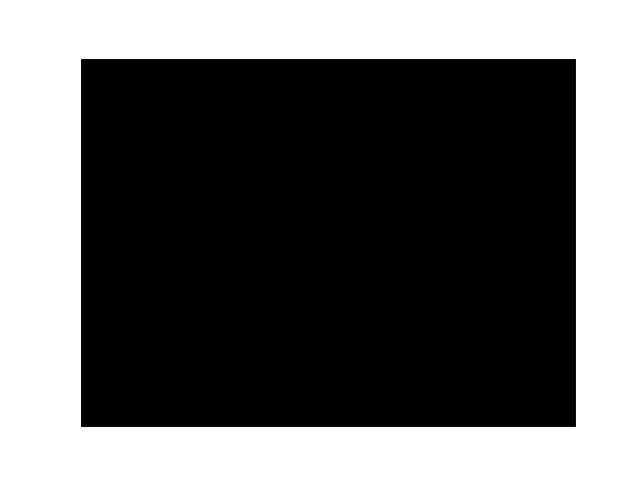

In [358]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od2[:,0]
y=od2[:,2]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
    line.set_data(od2[:i,0], od2[:i,2])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, )
plt.show()